In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from glob import glob
from tensorflow.keras.models import Model

In [5]:
#downloading data

In [6]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2020-07-28 06:15:21--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 172.67.213.166, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  10.1MB/s    in 52s     

2020-07-28 06:16:14 (8.15 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [7]:
!unzip -qq -o Food-5K.zip

In [8]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [9]:
!ls Food-5K/training

0_0.jpg     0_1387.jpg	0_422.jpg  0_809.jpg   1_1195.jpg  1_230.jpg  1_617.jpg
0_1000.jpg  0_1388.jpg	0_423.jpg  0_80.jpg    1_1196.jpg  1_231.jpg  1_618.jpg
0_1001.jpg  0_1389.jpg	0_424.jpg  0_810.jpg   1_1197.jpg  1_232.jpg  1_619.jpg
0_1002.jpg  0_138.jpg	0_425.jpg  0_811.jpg   1_1198.jpg  1_233.jpg  1_61.jpg
0_1003.jpg  0_1390.jpg	0_426.jpg  0_812.jpg   1_1199.jpg  1_234.jpg  1_620.jpg
0_1004.jpg  0_1391.jpg	0_427.jpg  0_813.jpg   1_119.jpg   1_235.jpg  1_621.jpg
0_1005.jpg  0_1392.jpg	0_428.jpg  0_814.jpg   1_11.jpg    1_236.jpg  1_622.jpg
0_1006.jpg  0_1393.jpg	0_429.jpg  0_815.jpg   1_1200.jpg  1_237.jpg  1_623.jpg
0_1007.jpg  0_1394.jpg	0_42.jpg   0_816.jpg   1_1201.jpg  1_238.jpg  1_624.jpg
0_1008.jpg  0_1395.jpg	0_430.jpg  0_817.jpg   1_1202.jpg  1_239.jpg  1_625.jpg
0_1009.jpg  0_1396.jpg	0_431.jpg  0_818.jpg   1_1203.jpg  1_23.jpg   1_626.jpg
0_100.jpg   0_1397.jpg	0_432.jpg  0_819.jpg   1_1204.jpg  1_240.jpg  1_627.jpg
0_1010.jpg  0_1398.jpg	0_433.jpg  0_81.jpg    1_1205.j

In [12]:
!mv Food-5K/* .

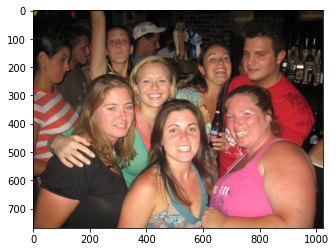

In [13]:
plt.imshow(image.load_img('training/0_408.jpg'))

In [14]:
#so we can say images with 0 are non food and 1 are food

In [15]:
!mkdir data

In [16]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/non_food
!mkdir data/test/food
!mkdir data/test/non_food

In [17]:
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food

mv: target 'data/train/nonfood' is not a directory
mv: target 'data/test/nonfood' is not a directory


In [18]:
!mv validation/0*.jpg data/test/non_food
!mv training/0*.jpg data/train/non_food

In [19]:
trainpath='data/train'
validpath='data/test'

In [20]:
image_files=glob(trainpath+'/*/*.jpg')
valid_image_files=glob(validpath+'/*/*.jpg')

In [22]:
folders = glob(trainpath + '/*')
folders

['data/train/food', 'data/train/non_food']

In [24]:
IMAGE_SIZE = [200, 200]


ptm=PretrainedModel(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [25]:
ptm.trainable=False

In [26]:
#lets make our model

k=len(folders)
x=Flatten()(ptm.output)
x=Dense(k,activation='softmax')(x)







In [28]:
model=Model(inputs=ptm.input,outputs=x)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [31]:
gen_train=ImageDataGenerator(rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  preprocessing_function=preprocess_input)

gen_valid=ImageDataGenerator(preprocessing_function=preprocess_input)

In [32]:
train_generator=gen_train.flow_from_directory(trainpath,target_size=IMAGE_SIZE,shuffle=True,batch_size=128)

Found 3000 images belonging to 2 classes.


In [33]:
valid_generator=gen_valid.flow_from_directory(validpath,target_size=IMAGE_SIZE,batch_size=128)

Found 1000 images belonging to 2 classes.


In [34]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [37]:
#batch size =128
r=model.fit_generator(train_generator,validation_data=valid_generator,epochs=5,steps_per_epoch=int(np.ceil(len(image_files) / 128)),validation_steps=int(np.ceil(len(valid_image_files) / 128)))

Epoch 1/5
24/24 [==============================] - 56s 2s/step - loss: 1.6567 - accuracy: 0.9247 - val_loss: 0.5137 - val_accuracy: 0.9820
Epoch 2/5
24/24 [==============================] - 49s 2s/step - loss: 0.4872 - accuracy: 0.9750 - val_loss: 0.4782 - val_accuracy: 0.9820
Epoch 3/5
24/24 [==============================] - 47s 2s/step - loss: 0.4285 - accuracy: 0.9787 - val_loss: 0.4064 - val_accuracy: 0.9800
Epoch 4/5
24/24 [==============================] - 47s 2s/step - loss: 0.1393 - accuracy: 0.9913 - val_loss: 0.5482 - val_accuracy: 0.9770
Epoch 5/5
24/24 [==============================] - 47s 2s/step - loss: 0.2440 - accuracy: 0.9887 - val_loss: 0.5000 - val_accuracy: 0.9740


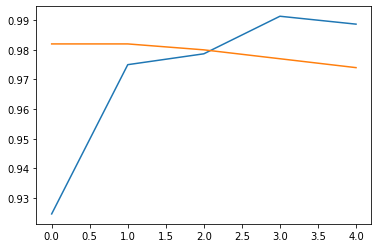

In [39]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

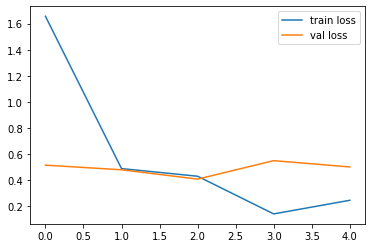

In [41]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()